# Price Action Analysis

### Shell

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [3]:
df = pd.read_csv('C:\\Users\\Galaxy Computers\\Downloads\\SHEL.csv',parse_dates=['Date'])

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-10,51.790001,52.029999,51.119999,51.160000,49.236023,3820625
1,2022-10-11,50.730000,51.250000,50.060001,50.180000,48.292881,4254453
2,2022-10-12,50.009998,50.724998,49.724201,50.320000,48.427616,4001576
3,2022-10-13,50.320000,52.494999,50.320000,52.189999,50.227291,9291623
4,2022-10-14,51.430000,51.590000,50.470001,50.529999,48.629719,5436625


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2023-10-03,63.299999,63.445000,62.840000,63.369999,63.369999,4414530
247,2023-10-04,62.610001,62.639999,61.590000,62.040001,62.040001,8040217
248,2023-10-05,61.660000,62.660000,61.650002,62.660000,62.660000,5707383
249,2023-10-06,63.590000,64.669998,63.060001,64.529999,64.529999,6938644
250,2023-10-09,65.480003,66.129997,65.330002,66.120003,66.120003,7329717


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,59.251135,59.740008,58.817278,59.286773,58.221163,4.715565e+06
std,3.202872,3.097819,3.203085,3.160038,3.642984,1.631648e+06
min,50.009998,50.724998,49.724201,50.180000,48.292881,1.500910e+06
25%,57.255001,57.737499,56.664999,57.105000,55.716867,3.623728e+06
50%,59.849998,60.338001,59.505001,59.860001,59.008495,4.421843e+06
75%,61.459999,61.790001,61.075001,61.429998,60.670168,5.351138e+06
max,65.599998,66.129997,65.330002,66.120003,66.120003,1.277934e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


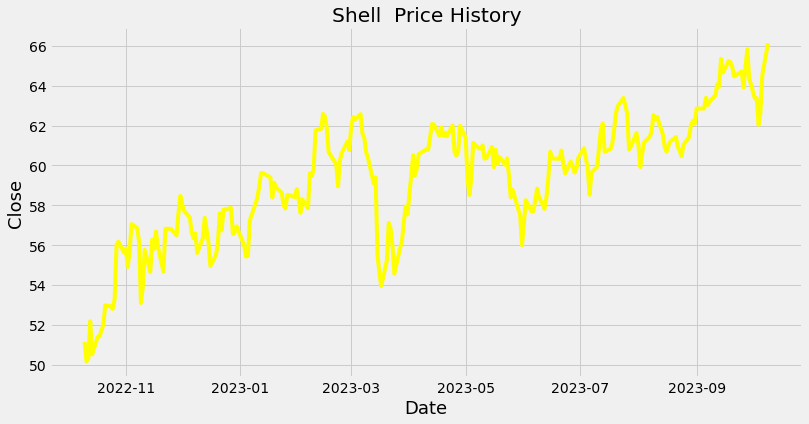

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'],color='yellow')
plt.title('Shell  Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close',fontsize=18)

plt.show()

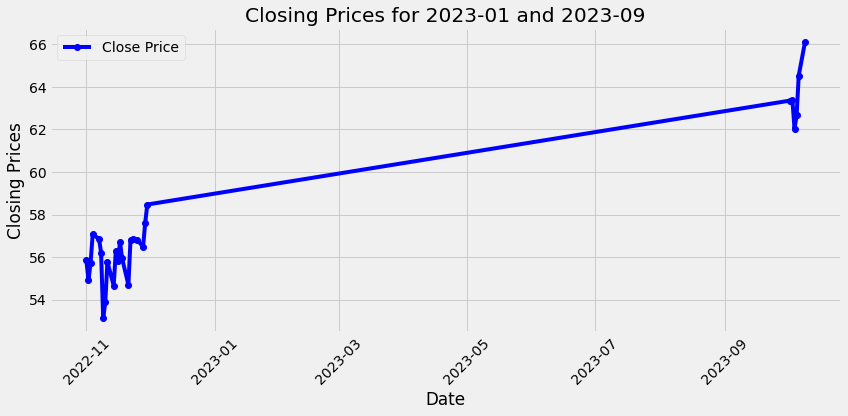

In [9]:
selected_years = ['2022-11', '2023-10']
filtered_df = df[df['Date'].dt.strftime('%Y-%m').isin(selected_years)]

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df['Close'], marker='o', linestyle='-', color='b', label='Close Price')

plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.title('Closing Prices for 2023-01 and 2023-09')

plt.xticks(rotation=45)
plt.legend()
plt.grid(True) 
plt.tight_layout()  
plt.show()


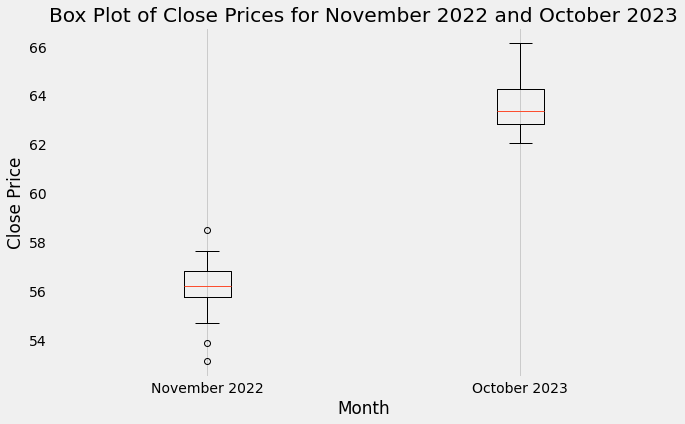

In [10]:
filtered_df = df[((df['Date'].dt.year == 2022) & (df['Date'].dt.month == 11)) |
                  ((df['Date'].dt.year == 2023) & (df['Date'].dt.month == 10))]

# Create a box plot of 'Close' prices for the two months
plt.figure(figsize=(10, 6))
plt.boxplot([filtered_df[filtered_df['Date'].dt.month == 11]['Close'], filtered_df[filtered_df['Date'].dt.month == 10]['Close']],
            labels=['November 2022', 'October 2023'])
plt.title('Box Plot of Close Prices for November 2022 and October 2023')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.grid(axis='y')
plt.show()

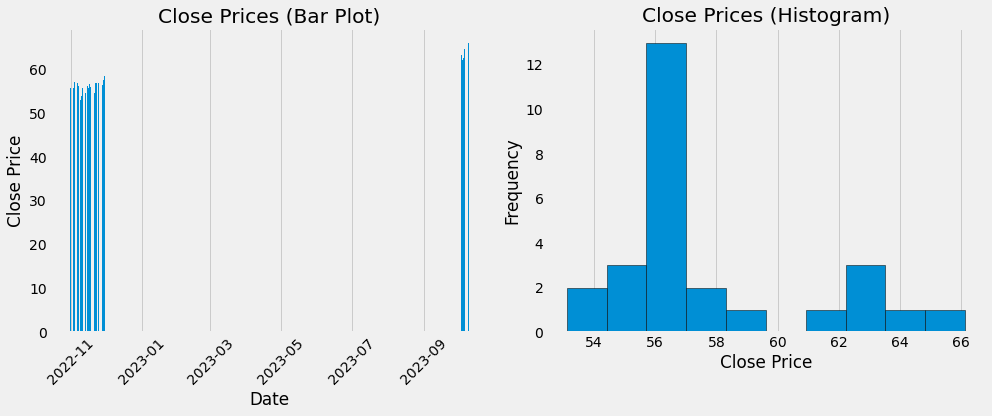

In [11]:
filtered_df = df[(df['Date'].dt.year == 2022) & (df['Date'].dt.month == 11) |
                  (df['Date'].dt.year == 2023) & (df['Date'].dt.month == 10)]

# Create a figure with two subplots: one for the bar plot and one for the histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
ax1.bar(filtered_df['Date'], filtered_df['Close'])
ax1.set_title('Close Prices (Bar Plot)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')

# Histogram
ax2.hist(filtered_df['Close'], bins=10, edgecolor='k')
ax2.set_title('Close Prices (Histogram)')
ax2.set_xlabel('Close Price')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

In [12]:
data =df.filter(['Close'])
dataset = data.values
traning_data_len = math.ceil(len(dataset)*.8)
traning_data_len

201

In [13]:
#SclaScale the data
scale = MinMaxScaler(feature_range=(0,1))
scaled_data = scale.fit_transform(dataset)
scaled_data

array([[0.06148054],
       [0.        ],
       [0.00878293],
       [0.12609778],
       [0.02195727],
       [0.07716435],
       [0.07904635],
       [0.09786711],
       [0.11543285],
       [0.17628617],
       [0.17314921],
       [0.16499376],
       [0.19636138],
       [0.36574636],
       [0.37641147],
       [0.34190715],
       [0.35508149],
       [0.29673771],
       [0.34818061],
       [0.43161855],
       [0.4190715 ],
       [0.37829347],
       [0.18381433],
       [0.23212047],
       [0.35069002],
       [0.2810539 ],
       [0.38268493],
       [0.35382678],
       [0.40840638],
       [0.36135495],
       [0.28293589],
       [0.41656203],
       [0.41718951],
       [0.41656203],
       [0.39585952],
       [0.46675016],
       [0.52007525],
       [0.49372632],
       [0.47302381],
       [0.4529486 ],
       [0.4077791 ],
       [0.38707634],
       [0.40213292],
       [0.34065245],
       [0.38770388],
       [0.45169383],
       [0.41279779],
       [0.374

In [14]:
train_data = scaled_data[0:traning_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <=60:
        print(x_train)
        print(y_train)
        print()

[array([0.06148054, 0.        , 0.00878293, 0.12609778, 0.02195727,
       0.07716435, 0.07904635, 0.09786711, 0.11543285, 0.17628617,
       0.17314921, 0.16499376, 0.19636138, 0.36574636, 0.37641147,
       0.34190715, 0.35508149, 0.29673771, 0.34818061, 0.43161855,
       0.4190715 , 0.37829347, 0.18381433, 0.23212047, 0.35069002,
       0.2810539 , 0.38268493, 0.35382678, 0.40840638, 0.36135495,
       0.28293589, 0.41656203, 0.41718951, 0.41656203, 0.39585952,
       0.46675016, 0.52007525, 0.49372632, 0.47302381, 0.4529486 ,
       0.4077791 , 0.38707634, 0.40213292, 0.34065245, 0.38770388,
       0.45169383, 0.41279779, 0.37452954, 0.29987441, 0.33500621,
       0.37327477, 0.4654954 , 0.41154334, 0.4767878 , 0.48243397,
       0.40025093, 0.40715162, 0.42471767, 0.36386442, 0.32936004])]
[0.33249680065932186]



In [15]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [16]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(141, 60, 1)

In [17]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))  # Added the missing closing parenthesis here
model.add(Dense(25))
model.add(Dense(1)) 
          

In [18]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

141/141 [==============================] - 7s 25ms/step - loss: 0.0267


In [20]:
test_data = scaled_data[traning_data_len - 60:, :]

x_test = []
y_test = dataset[traning_data_len:, :]  # Assuming dataset contains your target values

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

x_test = np.array(x_test)


In [21]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(50, 60, 1)

In [22]:
predict = model.predict(x_test)
predict = scale.inverse_transform(predict)

2/2 [==============================] - 1s 12ms/step


In [23]:
#let's get RMSE
rmse = np.sqrt(np.mean(predict-y_test)**2)
rmse 

1.2415869524804686

In [24]:
#Plot the data
train = data[:traning_data_len]
valid = data[traning_data_len:]
valid['predict'] = predict

C:\Users\Galaxy Computers\AppData\Local\Temp\ipykernel_14444\2808688855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predict'] = predict


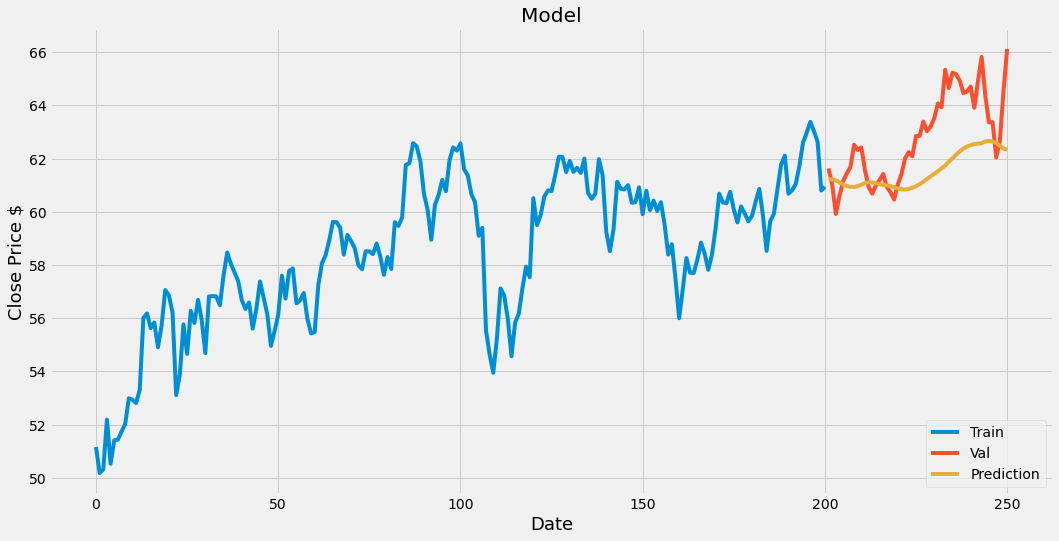

In [25]:
#Vizulation the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predict']])
plt.legend(['Train','Val','Prediction'], loc= 'lower right')